# <font size=8> Trends in Contraception Awareness and Child Health : Analysis of DHFS Data </font>

Team Details (Group 6)


*   Akshat Johar - 2020A3PS1793H
*   Shaurya Garg - 2020A8PS2215H
*   Saksham Bansal - 2020A3PS2129H





# <font size=7> Data Preprocessing </font>

---





In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# <font size=6>Data Preprocessing: Attribute Subset Selection</font>





Selecting the Columns from the original dataset which are related to the problem statement mentioned above

In [ ]:
import pandas as pd
cols = ['V002','V024','V025','V106','V190','V201','V212','V221','V228','V312','V384B','V463X','M18','S720','V360','V457','V701']
# cols1 = ['V002','V024','V025','V106','V190','V201','V212','V221','V228','V312','V384B','V463X','M18','S720', 'S234', 'V701', 'V628', 'V457', 'V447A', 'V401', 'V384C', 'V375A', 'V215', 'V203', 'V202', 'V152', 'V121', 'V120', 'V012']
df = pd.read_csv('/content/drive/MyDrive/Data_Mining/Datasets/IABR/IABR2019-21.csv', usecols = cols)
df.to_csv('new_data.csv')


<ipython-input-33-33b7bf6dd288>:4: DtypeWarning: Columns (127,152,183) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data_Mining/Datasets/IABR/IABR2019-21.csv', usecols = cols)


In [ ]:
# Number of rows in the dataset
len(df) 

1274250

In [ ]:
# Representaion of the Dataset
df.head(5)

,V002,V024,V025,V106,V190,V201,V212,V221,V228,V312,V360,V384B,V457,V463X,V701,M18,S720
0,45,1,2,1,3,2,24,3,0,9,,1,2,0,,,0
1,45,1,2,1,3,2,24,3,0,9,,1,2,0,,,0
2,83,1,2,0,3,3,18,15,0,6,,1,1,0,,,0
3,83,1,2,0,3,3,18,15,0,6,,1,1,0,,,0
4,83,1,2,0,3,3,18,15,0,6,,1,1,0,,,0


In [ ]:
## list and frequency of different values in the filtered columns
import numpy as np

def check_column_length(col):
  for abc in col:
    df[abc].values
    a = df[abc].value_counts(sort=False).to_dict()
    print(f"{abc} => {a}")

# abcd = ['V190']
check_column_length(cols)

V002 => {45: 14090, 83: 14149, 34: 17576, 1: 16049, 99: 8332, 75: 12962, 37: 10126, 35: 13271, 57: 10090, 95: 15289, 16: 17691, 58: 10770, 22: 10902, 80: 13400, 62: 17998, 21: 17396, 93: 21154, 91: 10844, 55: 14537, 68: 12094, 63: 13041, 98: 16837, 26: 13356, 79: 11327, 33: 14444, 85: 12786, 89: 9539, 20: 9885, 47: 10622, 78: 13425, 86: 12243, 43: 11294, 18: 9966, 50: 9915, 61: 14967, 2: 5787, 67: 13923, 90: 11996, 92: 13559, 65: 13345, 5: 11760, 38: 10652, 23: 9025, 48: 10611, 29: 11363, 14: 23998, 12: 12099, 39: 14145, 52: 10694, 28: 11510, 97: 9739, 73: 22452, 66: 9527, 54: 18505, 31: 20936, 40: 9792, 53: 25446, 51: 14683, 9: 9375, 10: 13566, 42: 15803, 32: 12540, 49: 10784, 13: 13074, 30: 13785, 72: 9903, 88: 10634, 3: 10776, 7: 14228, 77: 19026, 71: 8177, 69: 15715, 84: 12262, 76: 7968, 70: 7199, 44: 16929, 24: 15194, 74: 9219, 6: 8440, 15: 8002, 96: 10810, 59: 16460, 60: 9709, 4: 18504, 46: 14274, 64: 13304, 8: 13137, 27: 13774, 82: 8296, 36: 9003, 81: 10035, 19: 13449, 94: 17105

# <font size=6> Data Preprocessing : Data Cleaning (Removing Missing Values)</font>

Replacing the empty values in the dataset with NaN and removing rows with atleast one NaN value

In [ ]:
## replacing the empty values in the dataset with NaN
for column in df:
  test = df[column].name
  df[test] = df[test].replace(' ',np.nan)

In [ ]:
## Drop Rows that contain atleast one NaN value
for a in cols:
  df = df[df[a].notna()]

In [ ]:
len(df)  ## number of rows of processed dataset

14554

In [ ]:
def check_column_length(col):
  for abc in col:
    df[abc].values
    a = df[abc].value_counts(sort=False).to_dict()
    print(f"{abc} => {a}")

# abcd = ['V190']
check_column_length(cols)

V002 => {22: 150, 14: 176, 28: 124, 26: 154, 75: 157, 40: 71, 83: 261, 20: 105, 32: 191, 6: 102, 64: 209, 49: 151, 12: 113, 69: 155, 7: 143, 53: 207, 24: 242, 63: 87, 56: 129, 47: 58, 43: 131, 99: 165, 78: 247, 3: 206, 58: 165, 42: 116, 96: 179, 77: 188, 86: 105, 36: 69, 65: 120, 27: 172, 66: 137, 34: 148, 84: 101, 21: 214, 98: 198, 72: 66, 61: 207, 51: 144, 76: 103, 70: 125, 35: 170, 41: 109, 17: 104, 73: 317, 10: 205, 81: 125, 33: 155, 30: 119, 11: 170, 62: 179, 55: 117, 68: 133, 50: 149, 59: 194, 44: 273, 37: 116, 48: 143, 74: 90, 19: 213, 52: 76, 16: 208, 8: 81, 92: 220, 93: 273, 85: 100, 80: 130, 38: 183, 82: 153, 29: 235, 13: 50, 88: 86, 97: 155, 5: 131, 90: 176, 9: 74, 71: 127, 79: 165, 15: 64, 31: 212, 89: 82, 54: 151, 87: 106, 94: 173, 25: 136, 4: 136, 57: 134, 45: 168, 39: 101, 46: 125, 1: 229, 95: 100, 91: 93, 2: 63, 67: 256, 23: 118, 18: 66, 60: 46}
V024 => {1: 411, 2: 212, 3: 435, 4: 19, 5: 291, 6: 360, 7: 235, 8: 1148, 9: 2868, 10: 1224, 11: 38, 12: 432, 13: 212, 14: 286,

* V025 Urban 11,556 Rural 2998
* V106 Education No = 3216 Primary =1944 secondary = 7400 higher = 1994
* V228 terminated pregnancy (can be used)
* V463x has skewed data (smoking)
* M18 size at birth (important)
* S720 - Alcohol has skewed data
* V360 reason for discontinuation can be used for clustering
* V457 Anaemia level important
* V701 partner edu level distributed and important


In [ ]:
df['M18'] = pd.to_numeric(df['M18']) ## converting to int_type for futher analysis


In [ ]:
# Representaion of Filtered Dataset with 0 NaN values
df.head(20)

,V002,V024,V025,V106,V190,V201,V212,V221,V228,V312,V360,V384B,V457,V463X,V701,M18,S720
52,22,1,2,2,5,1,24,9,0,1,4,1,2,0,2,3,0
212,14,1,2,2,4,2,26,11,0,3,7,0,4,0,2,3,0
215,28,1,2,3,4,1,23,23,0,1,4,0,4,0,3,3,0
217,26,1,2,0,2,4,19,15,0,0,4,1,4,0,2,3,0
234,75,1,2,1,3,4,19,13,0,6,7,1,4,0,0,3,0
235,75,1,2,1,3,4,19,13,0,6,7,1,4,0,0,3,0
355,40,1,2,2,4,2,25,18,0,9,7,1,3,0,2,3,0
453,83,1,2,2,3,1,27,14,0,0,2,1,3,0,2,3,0
456,20,1,2,3,5,2,23,11,0,2,2,1,2,0,3,3,0
593,32,1,2,2,5,2,33,28,1,0,2,1,4,0,3,3,0


In [ ]:
df.isna().sum().sum()  ## number of NaN values present in the Dataset after filtering


0

# <font size=6> Data Preprocessing : Feature Construction : Zone </font>

Clubbing together the 37 states into different regions for further analysis

In [ ]:
## Feature Creation , Dividing States based on Regions
zone={ 'Southern Zone' : [28,33,32,29,36,31,34,35] , 'Western Zone' : [30,27,24,25] , 'Eastern Zone' : [21,19,10,20,11] , 'North Eastern Zone' : [12,13,14,17,15,16,18], 'Central Zone' : [22,23,9,5], 'Northern Zone' : [8,7,1,2,3,4,6,37]}

In [ ]:
## Adding the zone value for differnt states belonging to each row of the dataset
zone_list=[]
n=df.shape[0]
for i in range(n):
    name=df.iloc[i]['V024']
    for z in zone:
        if name in zone[z]:
            zone_list.append(z)
print(len(zone_list))                     ## to verify that each row's state has been clusterd into the desired zone
print(n)

14554
14554


In [ ]:
df['Zone']=zone_list           ## adding Zone Column to the Dataset
df

,V002,V024,V025,V106,V190,V201,V212,V221,V228,V312,V360,V384B,V457,V463X,V701,M18,S720,Zone
52,22,1,2,2,5,1,24,9,0,1,4,1,2,0,2,3,0,Northern Zone
212,14,1,2,2,4,2,26,11,0,3,7,0,4,0,2,3,0,Northern Zone
215,28,1,2,3,4,1,23,23,0,1,4,0,4,0,3,3,0,Northern Zone
217,26,1,2,0,2,4,19,15,0,0,4,1,4,0,2,3,0,Northern Zone
234,75,1,2,1,3,4,19,13,0,6,7,1,4,0,0,3,0,Northern Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274114,93,37,1,2,4,2,28,9,0,0,9,1,2,0,2,3,0,Northern Zone
1274115,93,37,1,2,4,2,28,9,0,0,9,1,2,0,2,3,0,Northern Zone
1274121,43,37,1,0,2,4,31,10,0,0,1,0,2,0,1,3,0,Northern Zone
1274138,66,37,1,3,4,3,24,10,0,5,2,0,3,0,2,4,0,Northern Zone


In [ ]:
df.corr()     ## correlation matrix of the dataset

<ipython-input-16-2b69004f1e6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()     ## correlation matrix of the dataset


,V002,V024,V025,V106,V190,V201,V212,V228,V457,V463X,M18,S720
V002,1.000000,0.004844,0.004900,-0.010600,-0.012999,-0.004547,-0.005735,-0.006067,-0.011482,-0.015902,0.004687,0.006394
V024,0.004844,1.000000,-0.052653,0.083856,-0.076162,-0.092492,-0.029239,-0.031105,-0.021653,0.025283,-0.079116,0.058610
V025,0.004900,-0.052653,1.000000,-0.193231,-0.424940,0.088149,-0.108325,-0.044026,-0.091112,0.021958,0.018268,0.055910
V106,-0.010600,0.083856,-0.193231,1.000000,0.472090,-0.389666,0.198359,0.014640,0.075810,-0.038973,-0.044335,-0.087066
V190,-0.012999,-0.076162,-0.424940,0.472090,1.000000,-0.263454,0.244159,0.067559,0.107153,-0.048931,-0.050797,-0.103651
V201,-0.004547,-0.092492,0.088149,-0.389666,-0.263454,1.000000,-0.227820,-0.009113,-0.033253,0.020724,0.058788,0.074748
V212,-0.005735,-0.029239,-0.108325,0.198359,0.244159,-0.227820,1.000000,0.030816,0.045337,-0.001114,-0.017208,0.013976
V228,-0.006067,-0.031105,-0.044026,0.014640,0.067559,-0.009113,0.030816,1.000000,-0.005865,-0.003468,0.011774,-0.009187
V457,-0.011482,-0.021653,-0.091112,0.075810,0.107153,-0.033253,0.045337,-0.005865,1.000000,-0.017354,-0.008983,-0.016310
V463X,-0.015902,0.025283,0.021958,-0.038973,-0.048931,0.020724,-0.001114,-0.003468,-0.017354,1.000000,0.001699,0.046488


# <font size=5> Data Preprocessing : Data Cleaning </font>

Removing the states with less amount of samples

In [ ]:
## displaying number of entries corresponding to each state
import numpy as np

abc = 'V024'
df[abc].values
a = df[abc].value_counts(sort=False).to_dict()
print(f"{abc} => {a}")



V024 => {1: 411, 2: 212, 3: 435, 4: 19, 5: 291, 6: 360, 7: 235, 8: 1148, 9: 2868, 10: 1224, 11: 38, 12: 432, 13: 212, 14: 286, 15: 77, 16: 177, 17: 239, 18: 774, 19: 359, 20: 438, 21: 802, 22: 597, 23: 928, 24: 554, 25: 35, 27: 425, 28: 27, 29: 267, 30: 25, 31: 16, 32: 121, 33: 284, 34: 30, 35: 39, 36: 139, 37: 30}


In [ ]:
## removing states with less amount of entries
a = [4,11,25,28,30,31,34,35,37]
for x in a:
  df = df[df['V024'] != x]



In [ ]:
len(df)

14295

In [ ]:
## Removing the rows which don't contain info regarding Birth Weight of The Child
df['M18'].round(decimals = 2)
df = df[df['M18'] != 8]
abc = 'M18'
df[abc].values
a = df[abc].value_counts(sort=False).to_dict()
print(f"{abc} => {a}")
df = df[df['M18'] != 8]

M18 => {3: 10269, 1: 893, 5: 300, 4: 1143, 2: 1504}


# <font size=6> Data Preprocessing : Min-Max Normalization </font>

In [ ]:
## normalizing selected columns through min-max normalization
normalized_columns=['V190','M18']
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in normalized_columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df = min_max_scaling(df)
df

,V002,V024,V025,V106,V190,V201,V212,V221,V228,V312,V360,V384B,V457,V463X,V701,M18,S720,Zone
52,22,1,2,2,1.00,1,24,9,0,1,4,1,2,0,2,0.50,0,Northern Zone
212,14,1,2,2,0.75,2,26,11,0,3,7,0,4,0,2,0.50,0,Northern Zone
215,28,1,2,3,0.75,1,23,23,0,1,4,0,4,0,3,0.50,0,Northern Zone
217,26,1,2,0,0.25,4,19,15,0,0,4,1,4,0,2,0.50,0,Northern Zone
234,75,1,2,1,0.50,4,19,13,0,6,7,1,4,0,0,0.50,0,Northern Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270630,5,36,2,2,0.75,2,19,15,0,6,2,1,4,0,2,0.25,0,Southern Zone
1270631,96,36,2,2,0.50,3,16,9,0,6,2,1,2,0,1,0.25,0,Southern Zone
1270640,29,36,2,3,0.75,2,24,14,0,0,18,1,2,0,2,0.50,0,Southern Zone
1270653,55,36,2,2,0.75,2,21,13,0,0,7,1,1,0,3,0.25,0,Southern Zone


# <font size=6> Data Preprocessing : Sampling </font>

In [ ]:
## sampling the dataset by taking 50 samples from each state
df = df.groupby('V024').sample(n=50)  
df

,V002,V024,V025,V106,V190,V201,V212,V221,V228,V312,V360,V384B,V457,V463X,V701,M18,S720,Zone
14701,34,1,2,2,1.00,3,20,10,0,1,4,1,3,0,3,0.5,0,Northern Zone
17920,7,1,2,3,1.00,2,33,17,0,5,2,0,1,0,3,0.5,0,Northern Zone
22870,38,1,2,1,0.00,3,23,11,0,3,2,0,3,0,2,0.5,0,Northern Zone
838,69,1,2,2,1.00,2,23,10,0,6,3,1,3,0,3,0.5,0,Northern Zone
17084,38,1,1,2,0.75,2,28,10,0,1,7,0,4,0,3,0.5,0,Northern Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257235,9,36,2,2,1.00,2,21,28,1,6,2,1,4,0,2,0.5,0,Southern Zone
1245246,7,36,2,2,0.50,2,18,16,0,0,9,1,2,0,2,0.5,0,Southern Zone
1232738,75,36,2,2,0.50,2,22,35,0,6,2,1,4,0,2,0.5,0,Southern Zone
1249195,57,36,2,1,0.50,4,21,14,0,6,3,1,2,0,2,0.5,0,Southern Zone


In [ ]:
len(df)  # number of rows of the final dataset used for visulization purpose

1350

In [ ]:
# downloading the dataset obtained after the complete preprocessing
from google.colab import files
df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <font size=7> Data Visualization </font>

In [ ]:
import pandas as pd
df = pd.read_csv('working_dataset.csv')

In [ ]:
len(df)

1350

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,7)})


Clustering the states of India into 6 different zones to carry out further analysis. The table below displays the number of data points belonging to each region from the main dataset

In [ ]:
## splitting data frame based on different regions for futher analysis
df1=df.loc[df['Zone']=='Northern Zone']
df2=df.loc[df['Zone']=='Central Zone']
df3=df.loc[df['Zone']=='Southern Zone']
df4=df.loc[df['Zone']=='North Eastern Zone']
df5=df.loc[df['Zone']=='Eastern Zone']
df6=df.loc[df['Zone']=='Western Zone']

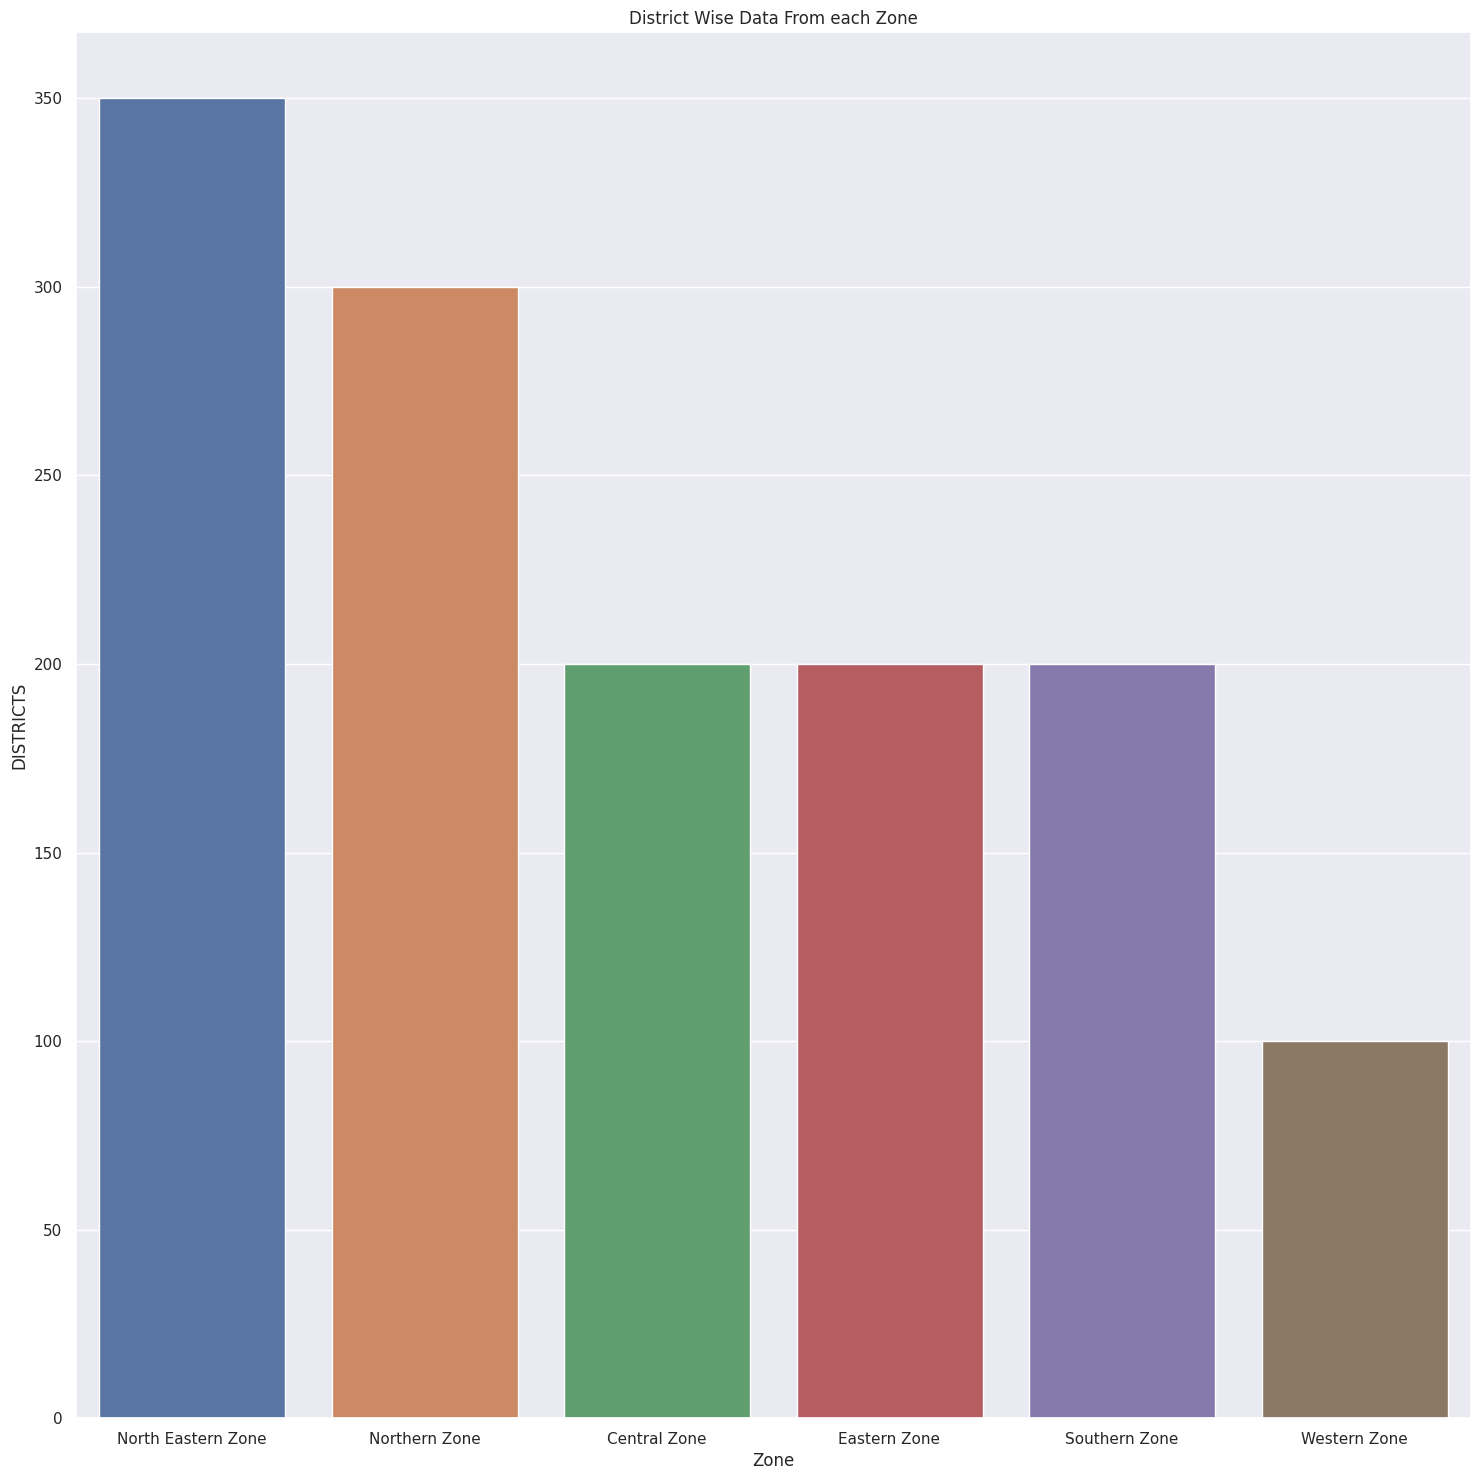

In [ ]:
## Number of data points from each zonez
plt.figure(figsize=(18,18))
sns.barplot(x=df['Zone'].value_counts().index,
              y=df['Zone'].value_counts().values)
plt.xlabel('Zone')
plt.ylabel('DISTRICTS')
plt.title('District Wise Data From each Zone')
plt.show()

In [ ]:
# df['M18'].round(decimals = 2)
# df2 = df2[df2['M18'] != 8]
# abc = 'M18'
# df2[abc].values
# a = df2[abc].value_counts(sort=False).to_dict()
# print(f"{abc} => {a}")

# <font size=6> Variation in Birth Weight Accross Different Regions</font>



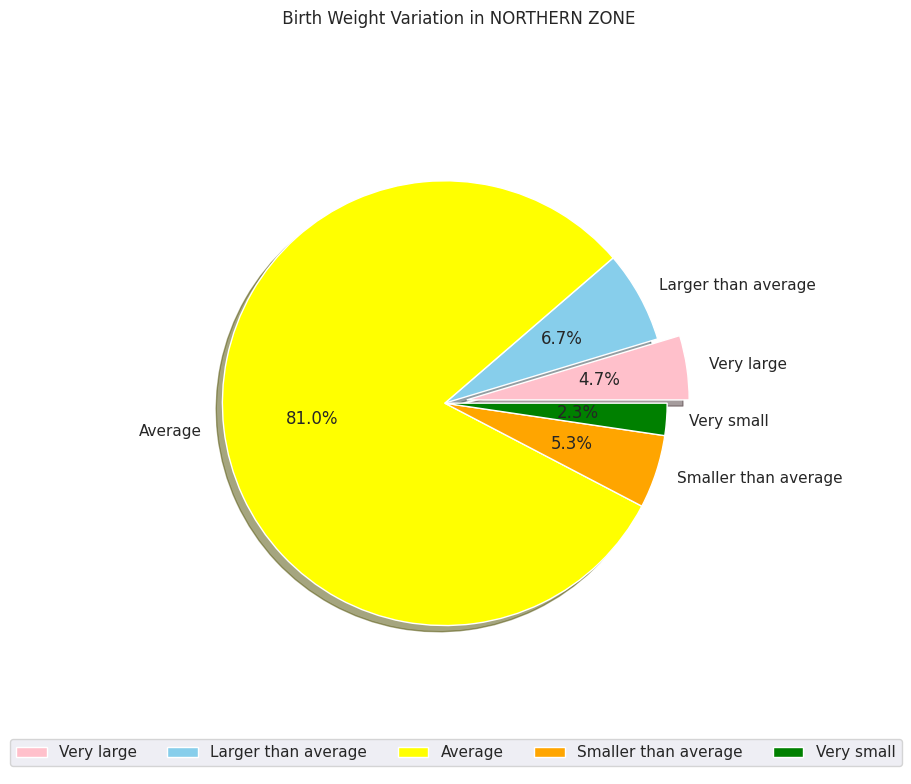

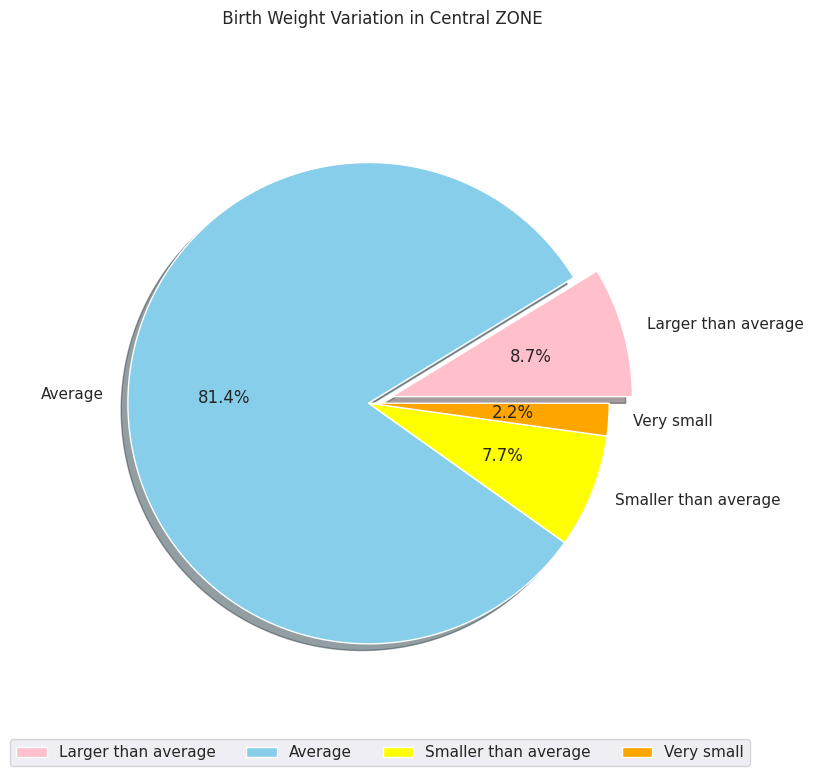

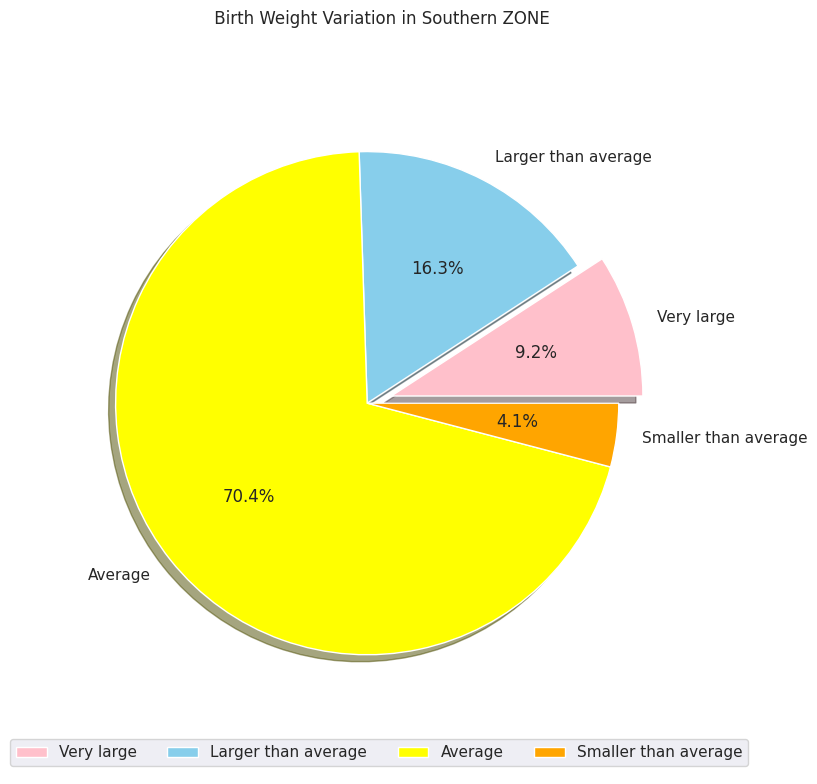

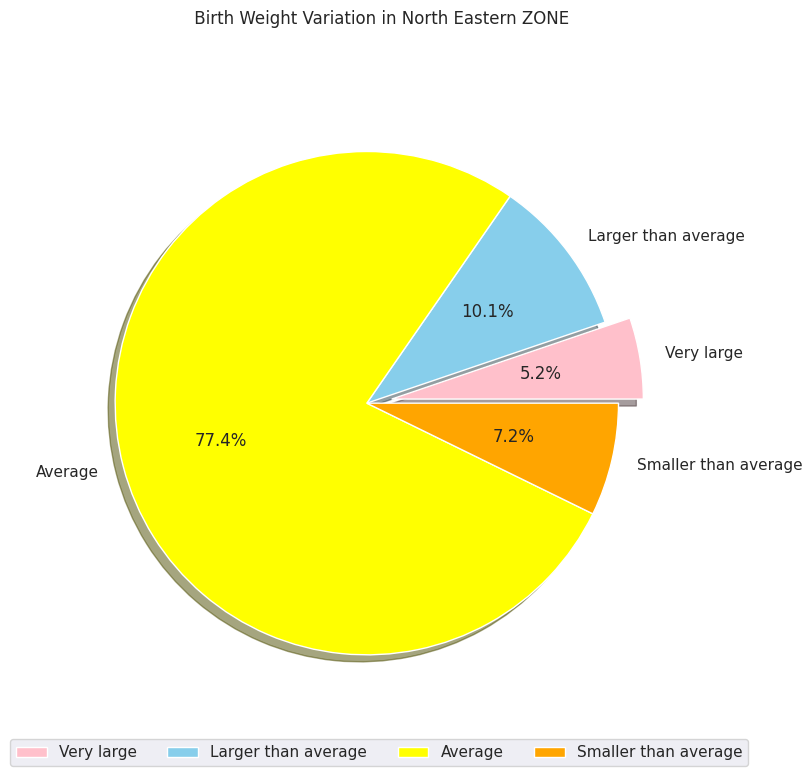

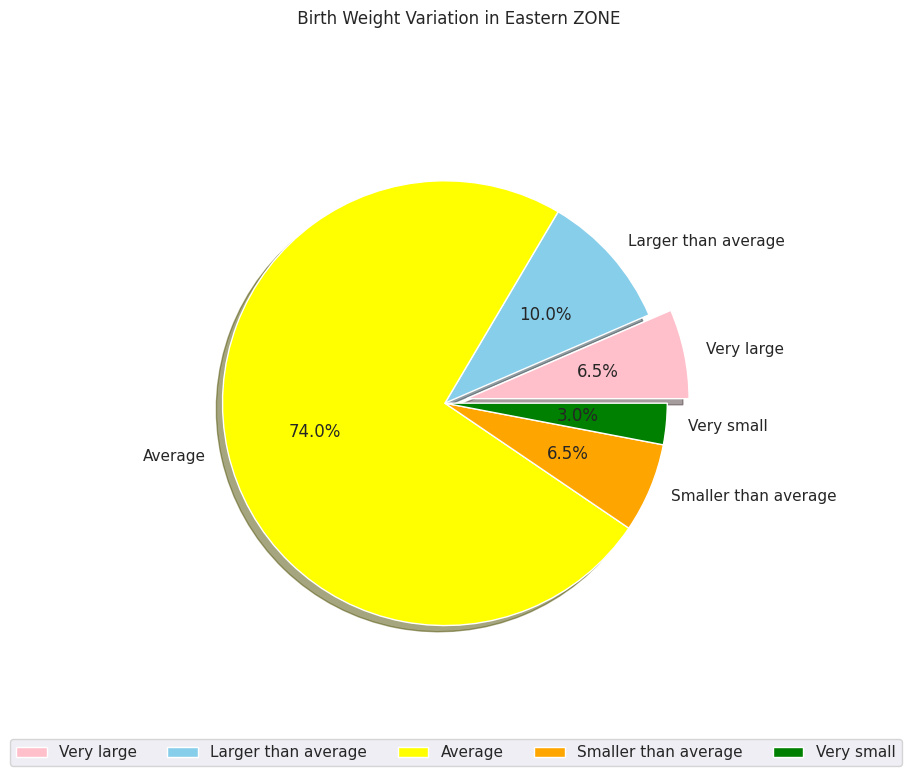

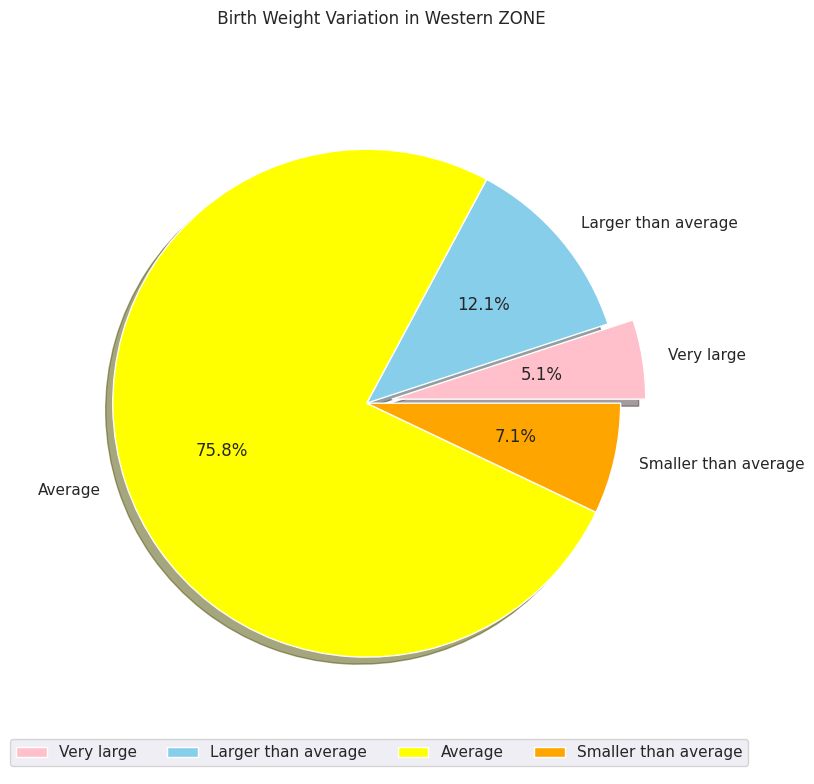

In [ ]:
## Plotting Pie Chart for different regions depecting variation in Birth Weight
# for north india
plt.figure(figsize=(8,8))
labels=['Very large','Larger than average','Average','Smaller than average','Very small']
colors=['pink','skyblue','yellow','orange','green']
explode=[0.1,0,0,0,0]

values = [df1['M18'].value_counts()[0],df1['M18'].value_counts()[0.25],df1['M18'].value_counts()[0.5],df1['M18'].value_counts()[0.75],df1['M18'].value_counts()[1]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Very large','Larger than average','Average','Smaller than average','Very small'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Birth Weight Variation in NORTHERN ZONE")
plt.tight_layout()
plt.show()


# for central india
plt.figure(figsize=(8,8))
labels=['Larger than average','Average','Smaller than average','Very small']
colors=['pink','skyblue','yellow','orange']
explode=[0.1,0,0,0]

values = [df2['M18'].value_counts()[0.25],df2['M18'].value_counts()[0.5],df2['M18'].value_counts()[0.75],df2['M18'].value_counts()[1]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Larger than average','Average','Smaller than average','Very small'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Birth Weight Variation in Central ZONE")
plt.tight_layout()
plt.show()


# for south india
plt.figure(figsize=(8,8))
labels=['Very large','Larger than average','Average','Smaller than average']
colors=['pink','skyblue','yellow','orange']
explode=[0.1,0,0,0]

values = [df3['M18'].value_counts()[0],df3['M18'].value_counts()[0.25],df3['M18'].value_counts()[0.5],df3['M18'].value_counts()[0.75]]
plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Very large','Larger than average','Average','Smaller than average'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Birth Weight Variation in Southern ZONE")
plt.tight_layout()
plt.show()


# for north east india
plt.figure(figsize=(8,8))
labels=['Very large','Larger than average','Average','Smaller than average']
colors=['pink','skyblue','yellow','orange']
explode=[0.1,0,0,0]

values = [df4['M18'].value_counts()[0],df4['M18'].value_counts()[0.25],df4['M18'].value_counts()[0.5],df4['M18'].value_counts()[0.75]]
plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Very large','Larger than average','Average','Smaller than average'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Birth Weight Variation in North Eastern ZONE")
plt.tight_layout()
plt.show()


# for east india
plt.figure(figsize=(8,8))
labels=['Very large','Larger than average','Average','Smaller than average','Very small']
colors=['pink','skyblue','yellow','orange','green']
explode=[0.1,0,0,0,0]

values = [df5['M18'].value_counts()[0],df5['M18'].value_counts()[0.25],df5['M18'].value_counts()[0.5],df5['M18'].value_counts()[0.75],df5['M18'].value_counts()[1]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Very large','Larger than average','Average','Smaller than average','Very small'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Birth Weight Variation in Eastern ZONE")
plt.tight_layout()
plt.show()


# for west india
plt.figure(figsize=(8,8))
labels=['Very large','Larger than average','Average','Smaller than average']
colors=['pink','skyblue','yellow','orange']
explode=[0.1,0,0,0]
values = [df6['M18'].value_counts()[0],df6['M18'].value_counts()[0.25],df6['M18'].value_counts()[0.5],df6['M18'].value_counts()[0.75]]
plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Very large','Larger than average','Average','Smaller than average'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Birth Weight Variation in Western ZONE")
plt.tight_layout()
plt.show()



# <font size=6>Choice Of Contraceptives Used Accross Different Regions of the Country</font>


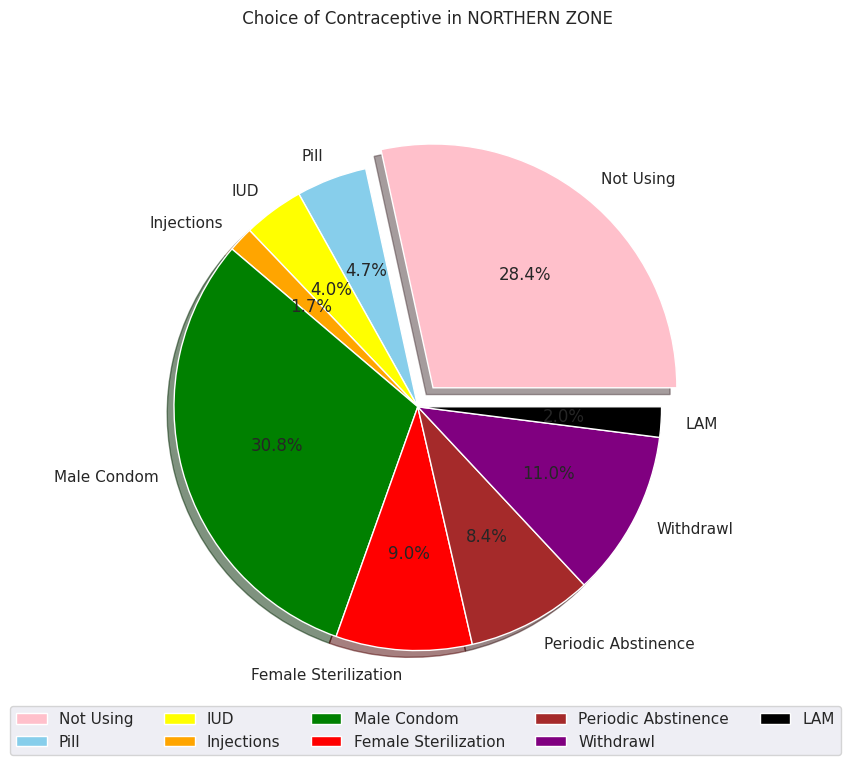

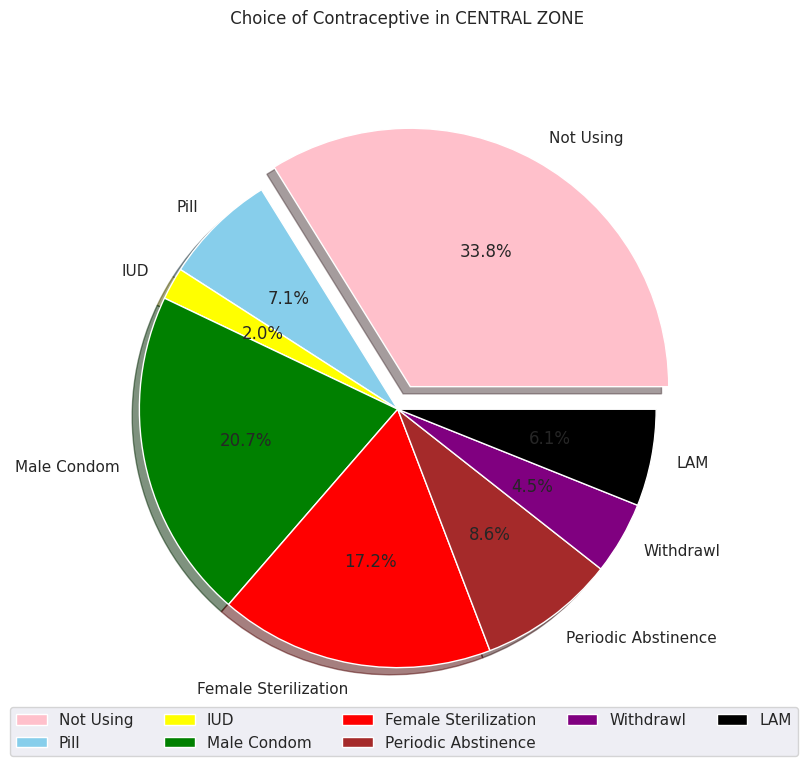

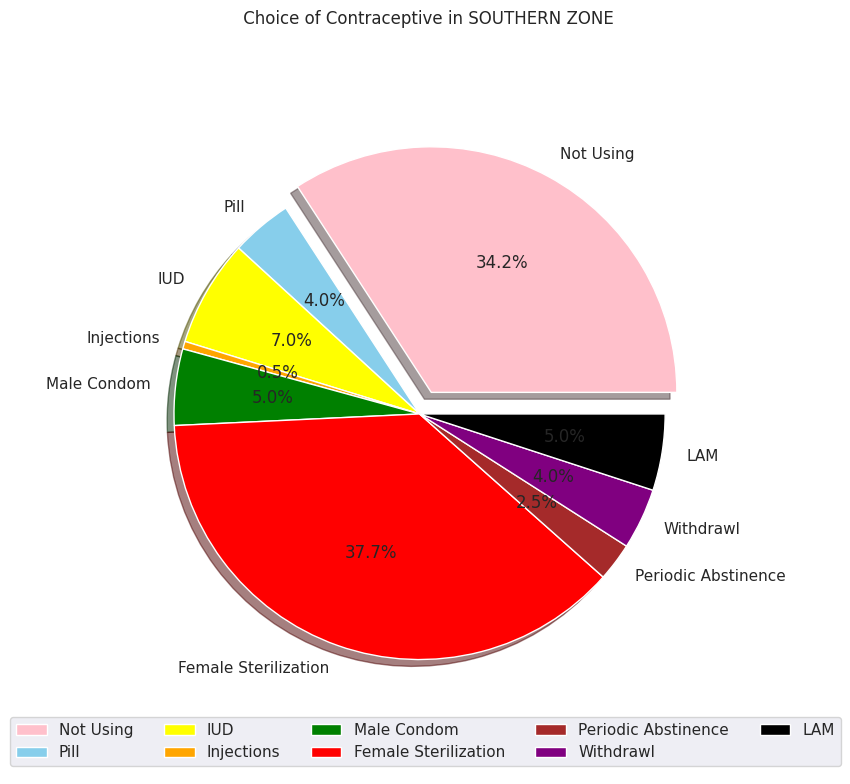

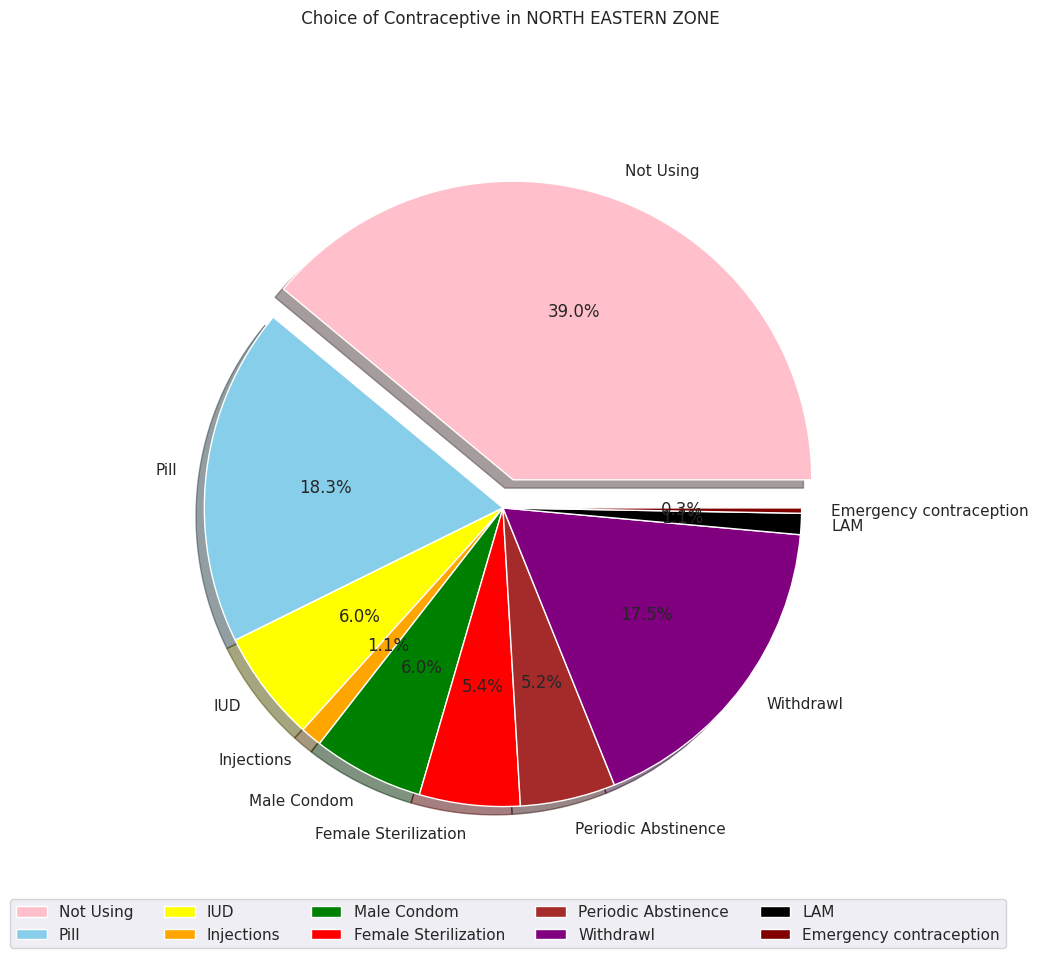

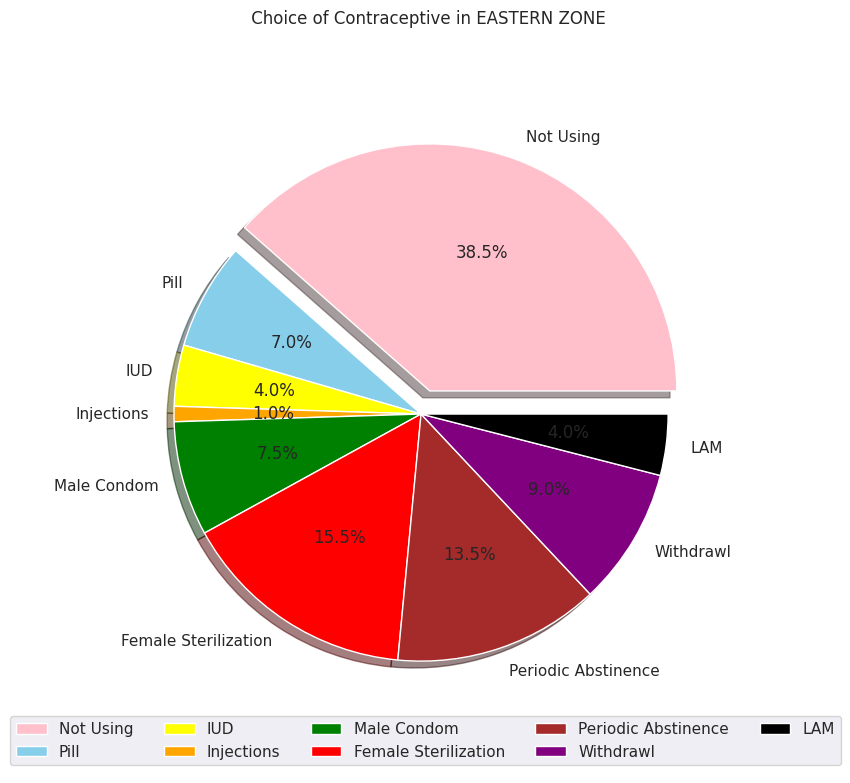

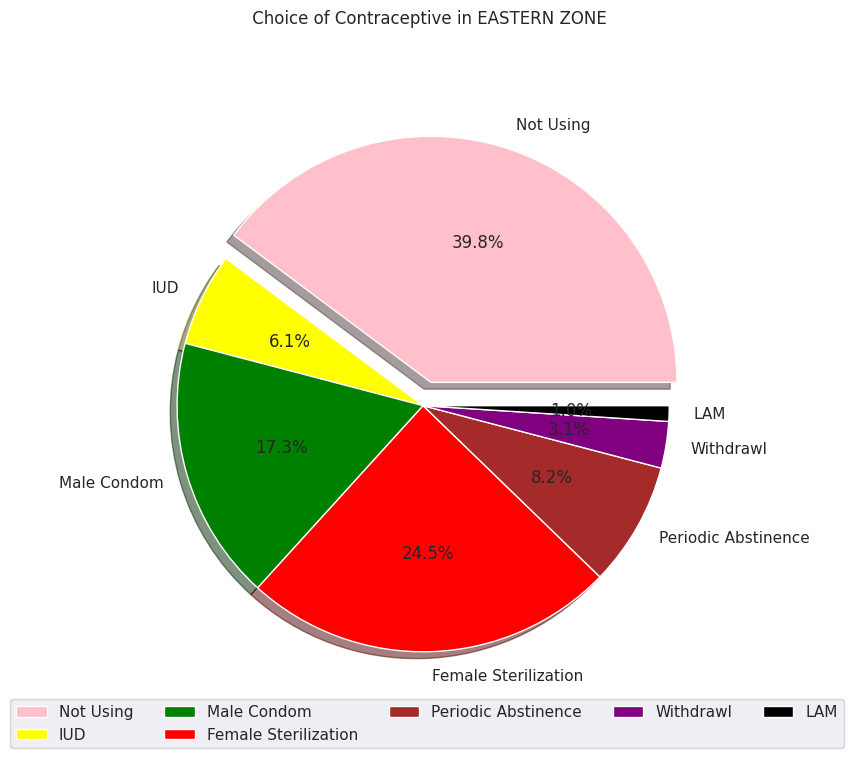

In [ ]:
# for north india
plt.figure(figsize=(8,8))
labels=['Not Using','Pill','IUD','Injections','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM']
colors=['pink','skyblue','yellow','orange','green','red','brown','purple','black']
explode=[0.1,0,0,0,0,0,0,0,0]

values = [df1['V312'].value_counts()[0],df1['V312'].value_counts()[1],df1['V312'].value_counts()[2],df1['V312'].value_counts()[3],df1['V312'].value_counts()[5],df1['V312'].value_counts()[6],df1['V312'].value_counts()[8],df1['V312'].value_counts()[9],df1['V312'].value_counts()[13]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Not Using','Pill','IUD','Injections','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Choice of Contraceptive in NORTHERN ZONE")
plt.tight_layout()
plt.savefig('north.png')
plt.show()



# for central india
plt.figure(figsize=(8,8))
labels=['Not Using','Pill','IUD','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM']
colors=['pink','skyblue','yellow','green','red','brown','purple','black']
explode=[0.1,0,0,0,0,0,0,0,]


values = [df2['V312'].value_counts()[0],df2['V312'].value_counts()[1],df2['V312'].value_counts()[2],df2['V312'].value_counts()[5],df2['V312'].value_counts()[6],df2['V312'].value_counts()[8],df2['V312'].value_counts()[9],df2['V312'].value_counts()[13]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Not Using','Pill','IUD','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Choice of Contraceptive in CENTRAL ZONE")
plt.tight_layout()
plt.show()




# for south india
plt.figure(figsize=(8,8))
labels=['Not Using','Pill','IUD','Injections','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM']
colors=['pink','skyblue','yellow','orange','green','red','brown','purple','black']
explode=[0.1,0,0,0,0,0,0,0,0]

values = [df3['V312'].value_counts()[0],df3['V312'].value_counts()[1],df3['V312'].value_counts()[2],df3['V312'].value_counts()[3],df3['V312'].value_counts()[5],df3['V312'].value_counts()[6],df3['V312'].value_counts()[8],df3['V312'].value_counts()[9],df3['V312'].value_counts()[13]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Not Using','Pill','IUD','Injections','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Choice of Contraceptive in SOUTHERN ZONE")
plt.tight_layout()
plt.show()



# for north eastern india
plt.figure(figsize=(10,10))
labels=['Not Using','Pill','IUD','Injections','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM','Emergency contraception']
colors=['pink','skyblue','yellow','orange','green','red','brown','purple','black','maroon']
explode=[0.1,0,0,0,0,0,0,0,0,0]


values = [df4['V312'].value_counts()[0],df4['V312'].value_counts()[1],df4['V312'].value_counts()[2],df4['V312'].value_counts()[3],df4['V312'].value_counts()[5],df4['V312'].value_counts()[6],df4['V312'].value_counts()[8],df4['V312'].value_counts()[9],df4['V312'].value_counts()[13],df4['V312'].value_counts()[16]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Not Using','Pill','IUD','Injections','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM','Emergency contraception'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Choice of Contraceptive in NORTH EASTERN ZONE")
plt.tight_layout()
plt.savefig('north_east.png')
plt.show()


# for east india
plt.figure(figsize=(8,8))
labels=['Not Using','Pill','IUD','Injections','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM']
colors=['pink','skyblue','yellow','orange','green','red','brown','purple','black']
explode=[0.1,0,0,0,0,0,0,0,0]

values = [df5['V312'].value_counts()[0],df5['V312'].value_counts()[1],df5['V312'].value_counts()[2],df5['V312'].value_counts()[3],df5['V312'].value_counts()[5],df5['V312'].value_counts()[6],df5['V312'].value_counts()[8],df5['V312'].value_counts()[9],df5['V312'].value_counts()[13]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Not Using','Pill','IUD','Injections','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Choice of Contraceptive in EASTERN ZONE")
plt.tight_layout()
plt.show()


# for west india
plt.figure(figsize=(8,8))
labels=['Not Using','IUD','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM']
colors=['pink','yellow','green','red','brown','purple','black']
explode=[0.1,0,0,0,0,0,0]


values = [df6['V312'].value_counts()[0],df6['V312'].value_counts()[2],df6['V312'].value_counts()[5],df6['V312'].value_counts()[6],df6['V312'].value_counts()[8],df6['V312'].value_counts()[9],df6['V312'].value_counts()[13]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Not Using','IUD','Male Condom','Female Sterilization','Periodic Abstinence','Withdrawl','LAM'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title(" Choice of Contraceptive in EASTERN ZONE")
plt.tight_layout()
plt.show()


In [ ]:
# Dividing Dataset into urban and rural regions for further analysis
df7=df.loc[df['V025']==1]
df8=df.loc[df['V025']==2]

In [ ]:
# abc = 'V201'
# df8[abc].values
# a = df8[abc].value_counts(sort=False).to_dict()
# print(f"{abc} => {a}")

# <font size=6> Total Number Of Children Born in Family Across Urban and Rural Households</font>


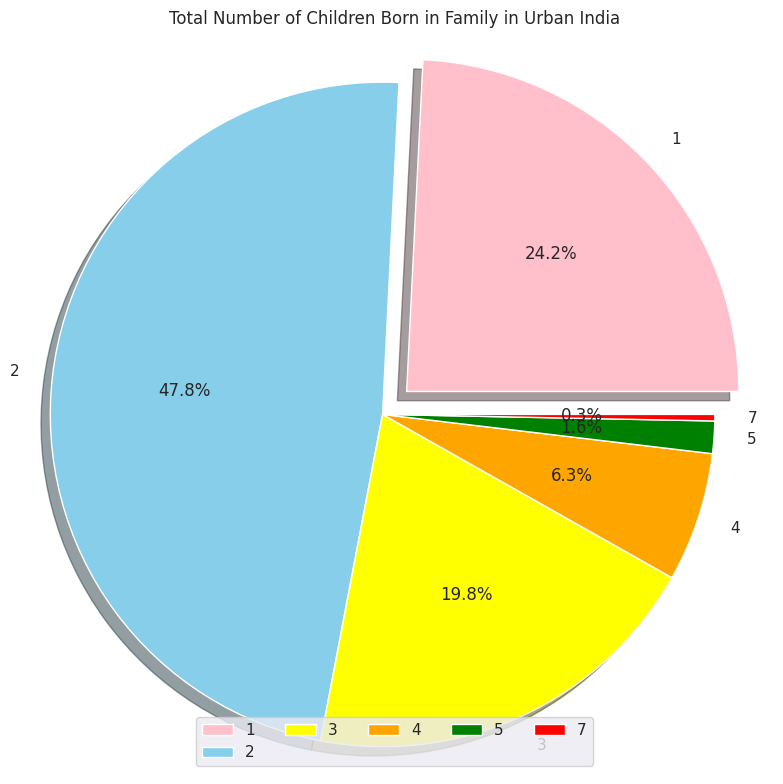

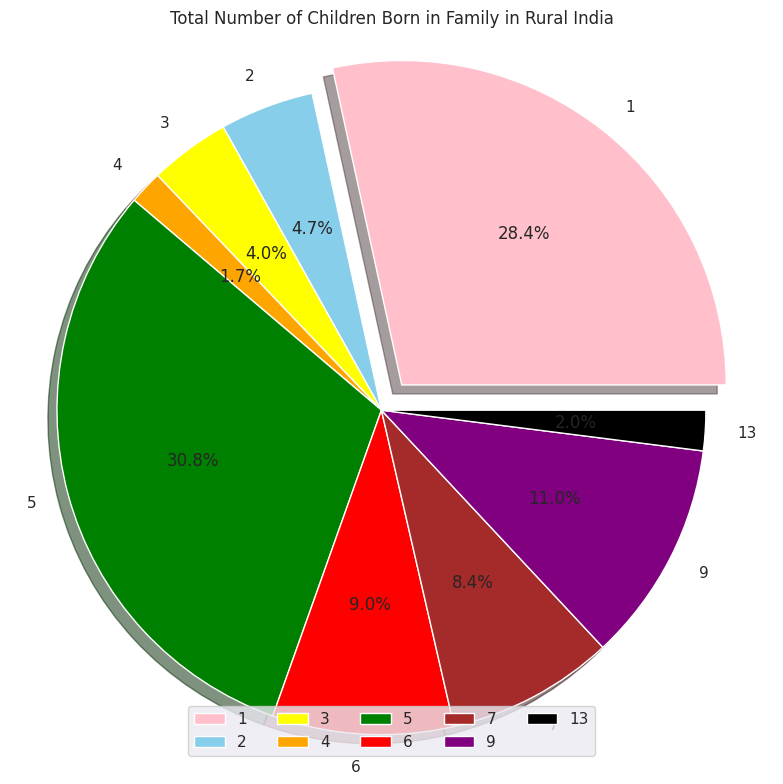

In [ ]:
# for urban india
plt.figure(figsize=(8,8))
labels=['1','2','3','4','5','7']
colors=['pink','skyblue','yellow','orange','green','red']
explode=[0.1,0,0,0,0,0]
values = [df7['V201'].value_counts()[1],df7['V201'].value_counts()[2],df7['V201'].value_counts()[3],df7['V201'].value_counts()[4],df7['V201'].value_counts()[5],df7['V201'].value_counts()[7]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['1','2','3','4','5','7'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title("Total Number of Children Born in Family in Urban India")
plt.tight_layout()
plt.show()


# for rural india
plt.figure(figsize=(8,8))
labels=['1','2','3','4','5','6','7','9','13']
colors=['pink','skyblue','yellow','orange','green','red','brown','purple','black']
explode=[0.1,0,0,0,0,0,0,0,0]


values = [df1['V312'].value_counts()[0],df1['V312'].value_counts()[1],df1['V312'].value_counts()[2],df1['V312'].value_counts()[3],df1['V312'].value_counts()[5],df1['V312'].value_counts()[6],df1['V312'].value_counts()[8],df1['V312'].value_counts()[9],df1['V312'].value_counts()[13]]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['1','2','3','4','5','6','7','9','13'] , loc='lower center',ncol=5, frameon=True)
plt.axis('equal')
plt.title("Total Number of Children Born in Family in Rural India")
plt.tight_layout()
plt.show()
